<center><h1><b><span style="color:blue">Files, data, event processing</span></b></h1></center>

#### **Quick intro to the following packages**
- `uproot` - ROOT I/O library in pure Python and NumPy.
- `awkward-array` - manipulate arrays of complex data structures as easily as NumPy.

&nbsp;
<center>
    <img src="images/logo_uproot.png" style="width:150px;"/>
    <h2><b><span style="color:green">ROOT I/O in pure Python and NumPy</span></b></h2>
</center>

### **What is ``uproot``?**

<span style="color:green">**Effectively what connects HEP data (ROOT format) with the Python scientific ecosystem around NumPy!**</span>

`uproot` provides very fast, efficient, and convenient access to ROOT trees.

- Pure Python + NumPy implementation of ROOT I/O.
- An array-centric view of ROOT TTree data:
  - Branches of simple types are simple arrays.
  - Branches of complex types are “jagged arrays”.
-  High performance for large baskets, despite Python’s slowness (because all per-entry operations are performed in NumPy).
- Greatest benefits: simplicity, minimal installation, set-up, and affinity with machine learning interfaces.

### **Why does it exist?**
1. To extract columnar data (branches) from a ROOT file without invoking the
event-handling infrastructure of the ROOT framework.
3. To express the semantics and conventions of the ROOT file format independently
of ROOT, in lieu of a formal specification.

### **Why Python + NumPy?**
- As stressed several times, the scientific Python ecosystem, including much of ML, is designed around a fundamental abstraction called the NumPy array.
- Working with computer scientists is easier when you can say, "*pip install uproot*".
- Implemented correctly, Python + NumPy doesn't have to be slow.
  - Finding the columnar data in a ROOT file may be done in slow Python, as long as
decompression and array manipulations are done by compiled code, see the now-old-ish performance study below.

### **1. Getting data from a simple ROOT TTree**

By "simple" we mean a file without *jagged structures*, or nested structures with branch sizes depending on an event-by-event basis.

In [1]:
import uproot

In [2]:
f = uproot.open('data/sample_simple-example.root')

f

<ReadOnlyDirectory '/' at 0x01839d529610>

ROOT files, directories, and trees are like Python dicts with keys() and values().

In [3]:
f.keys()

['events;1']

In [4]:
t = f["events"]
t.keys()

['Type',
 'Run',
 'Event',
 'E1',
 'px1',
 'py1',
 'pz1',
 'pt1',
 'eta1',
 'phi1',
 'Q1',
 'E2',
 'px2',
 'py2',
 'pz2',
 'pt2',
 'eta2',
 'phi2',
 'Q2',
 'M']

In [5]:
t['M']

<TBranch 'M' at 0x01839df55d60>

Uproot's main purpose is to read branches from ROOT files as NumPy arrays:

In [6]:
t['M'].array()

<Array [82.5, 83.6, 83.3, 82.1, ..., 96, 96.5, 96.7] type='2304 * float64'>

All branches can be looked at with `t.arrays()`. A subset is specified e.g. as `t.arrays(['Run', 'Event'])`:

In [7]:
t.arrays()

<Array [{Type: 'GT', Run: 148031, ...}, ...] type='2304 * {Type: string, Ru...'>

One can now start performing calculations. But let's avoid explicit loops and rather exploit the ecosystem ...

**Create a Pandas DataFrame**

In [8]:
import pandas

df = t.arrays(library="pd")
df

Type     Run      Event          E1        px1        py1         pz1  \
0       GT  148031   10507008   82.201866 -41.195288  17.433244  -68.964962   
1       TT  148031   10507008   62.344929  35.118050 -16.570362  -48.775247   
2       GT  148031   10507008   62.344929  35.118050 -16.570362  -48.775247   
3       GG  148031   10507008   60.621875  34.144437 -16.119525  -47.426984   
4       GT  148031  105238546   41.826389  22.783582  15.036444  -31.689894   
...    ...     ...        ...         ...        ...        ...         ...   
2299    GG  148029   99768888   32.701650  19.054651  14.833954   22.051323   
2300    GT  148029   99991333  168.780121 -68.041915 -26.105847 -152.235018   
2301    TT  148029   99991333   81.270136  32.377492   1.199406  -74.532431   
2302    GT  148029   99991333   81.270136  32.377492   1.199406  -74.532431   
2303    GG  148029   99991333   81.566217  32.485394   1.201350  -74.808372   

          pt1      eta1      phi1  Q1          E2        px2        py2  \
0     44.7322 -1.217690  2.741260   1   60.621875  34.144437 -16.119525   
1     38.8311 -1.051390 -0.440873  -1   82.201866 -41.195288  17.433244   
2     38.8311 -1.051390 -0.440873  -1   81.582778 -40.883323  17.299297   
3     38.8311 -1.051390 -0.440873  -1   81.582778 -40.883323  17.299297   
4     27.2981 -0.990688  0.583351   1   49.760726 -20.177373  -9.354149   
...       ...       ...       ...  ..         ...        ...        ...   
2299  24.1264  0.818806  0.661492   1   27.714554 -16.874052 -15.319644   
2300  72.8781 -1.482700 -2.775240  -1   81.566217  32.485394   1.201350   
2301  32.3997 -1.570440  0.037027   1  168.780121 -68.041915 -26.105847   
2302  32.3997 -1.570440  0.037027   1  170.583132 -68.794136 -26.398400   
2303  32.3997 -1.570440  0.037027   1  170.583132 -68.794136 -26.398400   

             pz2      pt2      eta2      phi2  Q2          M  
0     -47.426984  38.8311 -1.051390 -0.440873  -1  82.462692  
1     -68.964962  44.7322 -1.217690  2.741260   1  83.626204  
2     -68.447255  44.7322 -1.217690  2.741260   1  83.308465  
3     -68.447255  44.7322 -1.217690  2.741260   1  82.149373  
4      44.513955  21.8913  1.444340 -2.707650  -1  90.469123  
...          ...      ...       ...       ...  ..        ...  
2299  -15.768964  22.8145 -0.645971 -2.404430  -1  60.047138  
2300  -74.808372  32.3997 -1.570440  0.037027   1  96.125376  
2301 -152.235018  72.8781 -1.482700 -2.775240  -1  95.965480  
2302 -153.847604  72.8781 -1.482700 -2.775240  -1  96.495944  
2303 -153.847604  72.8781 -1.482700 -2.775240  -1  96.656728  

[2304 rows x 20 columns]

In [9]:
t.arrays(['Run', 'Event', 'pt1', 'pt2'], library="pd").head()

Run      Event      pt1      pt2
0  148031   10507008  44.7322  38.8311
1  148031   10507008  38.8311  44.7322
2  148031   10507008  38.8311  44.7322
3  148031   10507008  38.8311  44.7322
4  148031  105238546  27.2981  21.8913

### **2. Data with jagged structure**

In [10]:
f = uproot.open('data/sample_muons.root')

f.keys()

['Events;1']

In [11]:
branches = f['Events'].arrays()
                               
branches

<Array [{nMuon: 2, Muon_pt: [...], ...}, ...] type='100000 * {nMuon: uint32...'>

The jagged structure here comes from the number of muons per event, which is variable:

In [12]:
branches['nMuon']

<Array [2, 2, 1, 4, 4, 3, 2, ..., 1, 0, 3, 2, 3, 2, 3] type='100000 * uint32'>

This becomes evident when checking for example the $p_T$ of all muons:

In [13]:
branches['Muon_pt']

<Array [[10.8, 15.7], ..., [11.4, ..., 4.97]] type='100000 * var * float32'>

Print the $p_T$ for the muons in the first 10 events to trivially see the jagged structure:

In [14]:
print(' \n'.join([str(elm) for elm in branches['Muon_pt'][:10]]))

[10.8, 15.7] 
[10.5, 16.3] 
[3.28] 
[11.4, 17.6, 9.62, 3.5] 
[3.28, 3.64, 32.9, 23.7] 
[3.57, 4.57, 4.37] 
[57.6, 53] 
[11.3, 23.9] 
[10.2, 14.2] 
[11.5, 3.47]


We will get back to jagged arrays in a sec. Let's first show that `uproot` also has (limited) writing functionality.

&nbsp;<br><center><img src="images/logo_awkward-array.png" style="width: 150px;"/></center>

<center><h2><b><span style="color:green">Manipulate arrays of complex data structures as easily as NumPy</span></b></h2></center>

### **What is ``awkward-array``?**

Awkward Array is a library for nested, variable-sized data, including arbitrary-length lists, records, mixed types, and missing data, using NumPy-like idioms.

### **Example - di-muons in a sample of selected muons**

As seen above, the number of muons varies on an event-by-event basis:

In [15]:
branches['nMuon']

<Array [2, 2, 1, 4, 4, 3, 2, ..., 1, 0, 3, 2, 3, 2, 3] type='100000 * uint32'>

Can we see any structure in those events containing a $\mu^+ \mu^-$ pair? Interesting since many particles are known to decay as such, e.g. $J/\psi \to \mu^+ \mu^-$.

Let's first investigate the sample a bit further.

In [16]:
import awkward as ak

In [17]:
branches

<Array [{nMuon: 2, Muon_pt: [...], ...}, ...] type='100000 * {nMuon: uint32...'>

In [18]:
ak.type(branches)

ArrayType(RecordType([NumpyType('uint32'), ListType(NumpyType('float32')), ListType(NumpyType('float32')), ListType(NumpyType('float32')), ListType(NumpyType('float32')), ListType(NumpyType('int32'))], ['nMuon', 'Muon_pt', 'Muon_eta', 'Muon_phi', 'Muon_mass', 'Muon_charge']), 100000, None)

`1000000 *` means that there are a 100k events, `"Muon_pt": var *` means that the contents of the `"Muon_pt"` field are jagged: there's a variable number of them per event.

We could look at a few of these as Python lists and dicts.

In [19]:
ak.to_list(branches[:3])

[{'nMuon': 2,
  'Muon_pt': [10.763696670532227, 15.736522674560547],
  'Muon_eta': [1.0668272972106934, -0.563786506652832],
  'Muon_phi': [-0.03427272289991379, 2.5426154136657715],
  'Muon_mass': [0.10565836727619171, 0.10565836727619171],
  'Muon_charge': [-1, -1]},
 {'nMuon': 2,
  'Muon_pt': [10.538490295410156, 16.327096939086914],
  'Muon_eta': [-0.42778006196022034, 0.34922507405281067],
  'Muon_phi': [-0.2747921049594879, 2.539781332015991],
  'Muon_mass': [0.10565836727619171, 0.10565836727619171],
  'Muon_charge': [1, -1]},
 {'nMuon': 1,
  'Muon_pt': [3.2753264904022217],
  'Muon_eta': [2.210855484008789],
  'Muon_phi': [-1.2234135866165161],
  'Muon_mass': [0.10565836727619171],
  'Muon_charge': [1]}]

In [20]:
branches['nMuon'][0]

2

Nothing like a visual inspection, though:

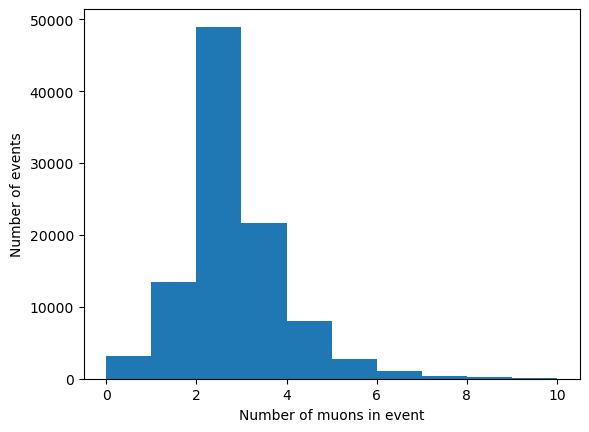

In [21]:
import matplotlib.pyplot as plt

plt.hist(branches['nMuon'], bins=10, range=(0, 10))
plt.xlabel('Number of muons in event')
plt.ylabel('Number of events');

Quickly do the same with Scikit-HEP histogramming tools (raison d'être of the `Hist` package)?

In [22]:
from hist import Hist
Hist.new.Reg(10, 0 ,10, name="nMuon", label="Number of muons in event").Double().fill(branches['nMuon'])

Hist(Regular(10, 0, 10, name='nMuon', label='Number of muons in event'), storage=Double()) # Sum: 99890.0 (100000.0 with flow)

The above even tells us something we did not realise from the other plot - there are 110 overflow entries. Indeed

In [23]:
ak.count(branches['nMuon'][branches['nMuon'] >=10])

110

How many muon entries are there in total?

In [24]:
# ak.num gives the number of elements in each nested list
len(branches['Muon_pt']), ak.sum(branches['nMuon']), sum(ak.num(branches['Muon_pt']))  # 235286 muons in 1e5 events

(100000, 235286, 235286)

In [25]:
sum(branches.nMuon)

235286

In [26]:
ak.type(branches.Muon_pt)

ArrayType(ListType(NumpyType('float32')), 100000, None)

Plot the $p_T$ and $\eta$ of all muons:

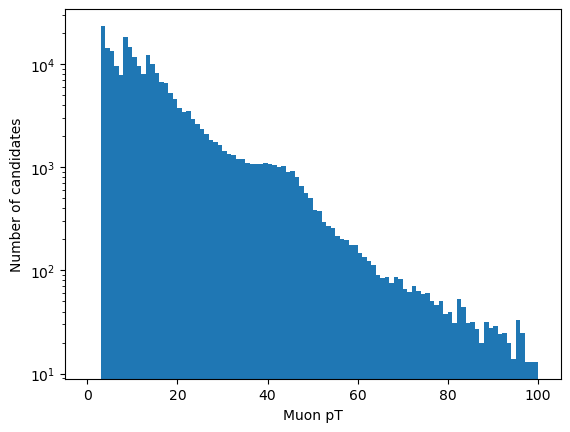

In [27]:
plt.hist(ak.flatten(branches.Muon_pt), bins=100, range=(0, 100))
plt.xlabel('Muon pT')
plt.ylabel('Number of candidates')
plt.yscale('log');

<>:2: SyntaxWarning: invalid escape sequence '\e'
<>:2: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Eduardo Rodrigues\AppData\Local\Temp\ipykernel_2452\3385647789.py:2: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('Muon $\eta$')


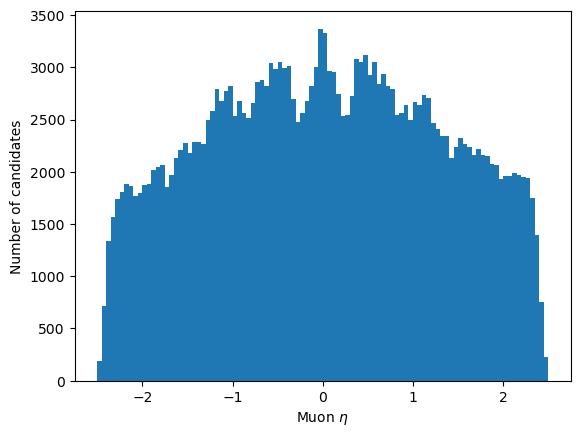

In [28]:
plt.hist(ak.flatten(branches.Muon_eta), bins=100, range=(-2.5, 2.5))
plt.xlabel('Muon $\eta$')
plt.ylabel('Number of candidates');

In [29]:
%%timeit
len(ak.flatten(branches.Muon_pt))

173 μs ± 36.1 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [30]:
%%timeit
sum(branches.nMuon)

242 ms ± 15.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Selections are done via masks. Let's create one that singles out events with a single muon:

In [31]:
branches['nMuon'] == 1

<Array [False, False, True, ..., False, False, False] type='100000 * bool'>

In [32]:
single_muon_mask = branches['nMuon'] == 1

print("There are {} single-muon events.".format(sum(single_muon_mask)))

There are 13447 single-muon events.


Just checking:

In [33]:
len(branches['Muon_pt'][single_muon_mask]), branches['Muon_pt'][single_muon_mask]

(13447,
 <Array [[3.28], [3.84], ..., [13.3], [9.48]] type='13447 * var * float32'>)

<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Eduardo Rodrigues\AppData\Local\Temp\ipykernel_2452\2975325906.py:2: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Muon $p_{\mathrm{T}}$ [MeV]')


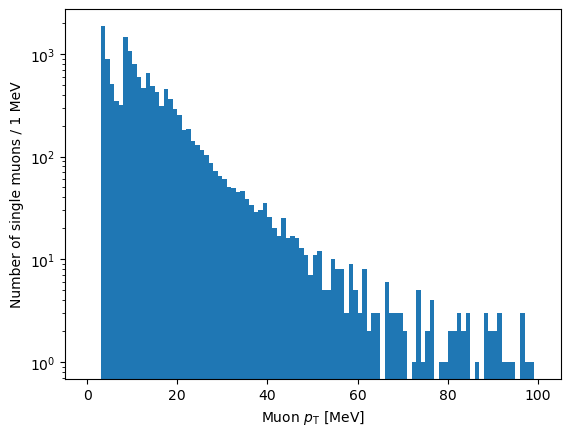

In [34]:
plt.hist(ak.flatten(branches['Muon_pt'][single_muon_mask]), bins=100, range=(0, 100))
plt.xlabel('Muon $p_{\mathrm{T}}$ [MeV]')
plt.ylabel('Number of single muons / 1 MeV')
plt.yscale('log')
plt.show()

Mask to select muons within $|\eta| <2$:

In [35]:
eta_mask = abs(branches['Muon_eta']) < 2
eta_mask

<Array [[True, True], ..., [True, True, True]] type='100000 * var * bool'>

In [36]:
ak.sum(ak.flatten(eta_mask))

204564

In [37]:
ak.num(eta_mask)

<Array [2, 2, 1, 4, 4, 3, 2, 2, ..., 1, 0, 3, 2, 3, 2, 3] type='100000 * int64'>

In [38]:
ak.sum(eta_mask)

204564

Again, a visual inspection never harms.

<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:8: SyntaxWarning: invalid escape sequence '\e'
<>:9: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:8: SyntaxWarning: invalid escape sequence '\e'
<>:9: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Eduardo Rodrigues\AppData\Local\Temp\ipykernel_2452\331263439.py:3: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('Muon $\eta$')
C:\Users\Eduardo Rodrigues\AppData\Local\Temp\ipykernel_2452\331263439.py:8: SyntaxWarning: invalid escape sequence '\e'
  plt.title('With $|\eta| < 2$ selection')
C:\Users\Eduardo Rodrigues\AppData\Local\Temp\ipykernel_2452\331263439.py:9: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('Muon $\eta$')


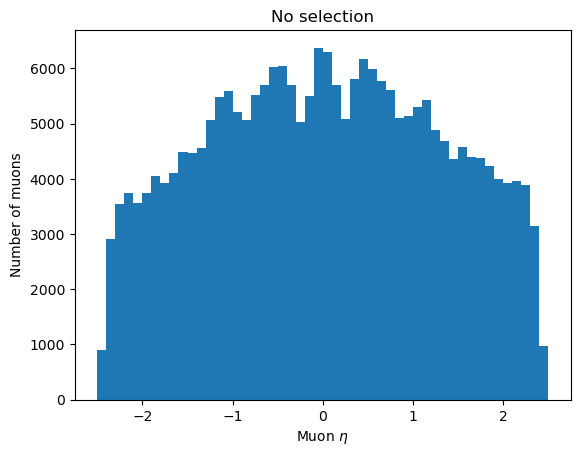

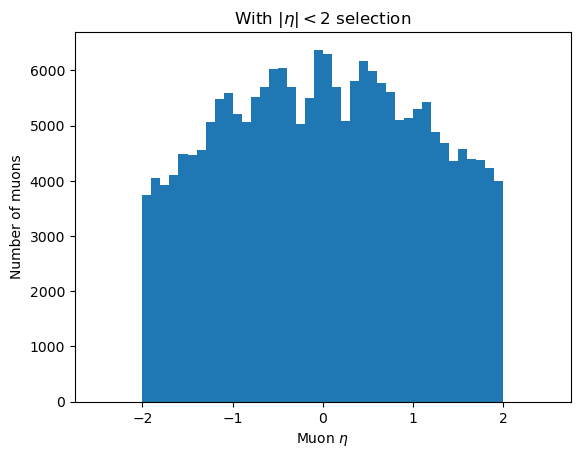

In [39]:
plt.hist(ak.flatten(branches['Muon_eta']), bins=50, range=(-2.5, 2.5))
plt.title('No selection')
plt.xlabel('Muon $\eta$')
plt.ylabel('Number of muons')
plt.show()

plt.hist(ak.flatten(branches['Muon_eta'][eta_mask]), bins=50, range=(-2.5, 2.5))
plt.title('With $|\eta| < 2$ selection')
plt.xlabel('Muon $\eta$')
plt.ylabel('Number of muons')
plt.show()

In [40]:
len(single_muon_mask & eta_mask)

100000

<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:6: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Eduardo Rodrigues\AppData\Local\Temp\ipykernel_2452\473299174.py:3: SyntaxWarning: invalid escape sequence '\e'
  label=['$|\eta| < 2$', '$|\eta| \geq 2$'],
C:\Users\Eduardo Rodrigues\AppData\Local\Temp\ipykernel_2452\473299174.py:3: SyntaxWarning: invalid escape sequence '\e'
  label=['$|\eta| < 2$', '$|\eta| \geq 2$'],
C:\Users\Eduardo Rodrigues\AppData\Local\Temp\ipykernel_2452\473299174.py:6: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('Muon $p_{\mathrm{T}}$ [GeV]')


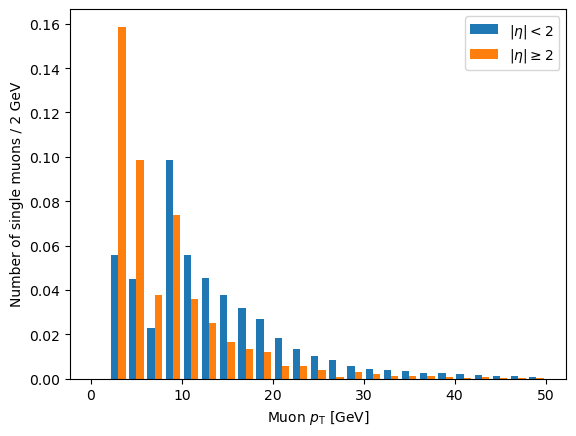

In [41]:
plt.hist([ak.flatten(branches['Muon_pt'][single_muon_mask & eta_mask]),
          ak.flatten(branches['Muon_pt'][single_muon_mask & ~eta_mask])],
         label=['$|\eta| < 2$', '$|\eta| \geq 2$'],
         density=True,
         bins=25, range=(0, 50))
plt.xlabel('Muon $p_{\mathrm{T}}$ [GeV]')
plt.ylabel('Number of single muons / 2 GeV')
plt.legend()
plt.show()

At last, concentrate on 2-muon events:

In [42]:
two_muons_mask = branches['nMuon'] == 2
two_muons_sample = branches[two_muons_mask]

In [43]:
sum(two_muons_mask)

48976

In [44]:
two_muons_sample

<Array [{nMuon: 2, Muon_pt: [...], ...}, ...] type='48976 * {nMuon: uint32,...'>

In [45]:
muon_vectors = ak.Array(two_muons_sample, with_name="Momentum4D")
muon_vectors

<Array [{nMuon: 2, Muon_pt: [...], ...}, ...] type='48976 * Momentum4D[nMuo...'>

In [46]:
muon_vectors.type

ArrayType(RecordType([NumpyType('uint32'), ListType(NumpyType('float32')), ListType(NumpyType('float32')), ListType(NumpyType('float32')), ListType(NumpyType('float32')), ListType(NumpyType('int32'))], ['nMuon', 'Muon_pt', 'Muon_eta', 'Muon_phi', 'Muon_mass', 'Muon_charge'], parameters={'__record__': 'Momentum4D'}), 48976, None)

In [47]:
muon_vectors[0]

<Record {nMuon: 2, Muon_pt: [...], ...} type='Momentum4D[nMuon: uint32, Muo...'>

In [48]:
two_muons_sample["Muon_pt"]

<Array [[10.8, 15.7], [...], ..., [3.31, 15.7]] type='48976 * var * float32'>

In [49]:
import vector

vector.register_awkward()

two_muon_p4=vector.zip({"pt":two_muons_sample["Muon_pt"], "eta":two_muons_sample["Muon_eta"],
"phi":two_muons_sample["Muon_phi"], "M":two_muons_sample["Muon_mass"]})

two_muon_p4

<MomentumArray4D [[{rho: 10.8, phi: ..., ...}, ...], ...] type='48976 * var...'>

In [50]:
first_muon_p4 = two_muon_p4[:,0]
second_muon_p4 = two_muon_p4[:,1]

first_muon_p4.deltaR(second_muon_p4)

<Array [3.05, 2.92, 3.16, 0.0955, ..., 4.47, 3.06, 2.88] type='48976 * float32'>

In [51]:
len(first_muon_p4)

48976

In [52]:
first_muon_p4.deltaR(second_muon_p4)

<Array [3.05, 2.92, 3.16, 0.0955, ..., 4.47, 3.06, 2.88] type='48976 * float32'>

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Eduardo Rodrigues\AppData\Local\Temp\ipykernel_2452\2261163067.py:2: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta R$ between muons')


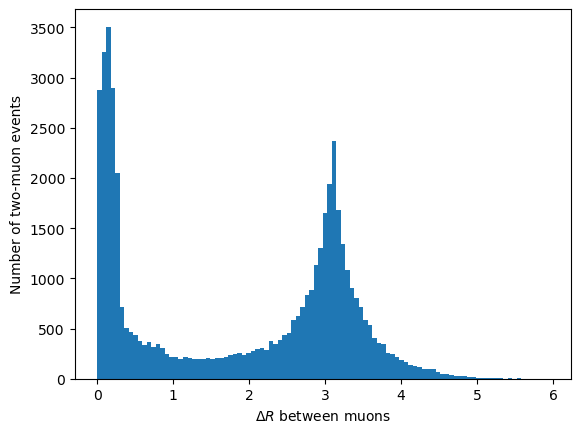

In [53]:
plt.hist(first_muon_p4.deltaR(second_muon_p4), bins=100)
plt.xlabel('$\Delta R$ between muons')
plt.ylabel('Number of two-muon events')
plt.show()

Are we done? No! We have not checked that the 2 muons have opposite charge ...
Further refine to $\mu^+\mu^-$ pairs - you see where're getting ;-):

In [54]:
sum_p4 = first_muon_p4 + second_muon_p4
opposite_sign_muons_mask = two_muons_sample['Muon_charge'][:, 0] != two_muons_sample['Muon_charge'][:, 1]
dimuon_p4 = sum_p4[opposite_sign_muons_mask]
dimuon_p4

<MomentumArray4D [{rho: 7.19, phi: 2.05, ...}, ...] type='37183 * Momentum4...'>

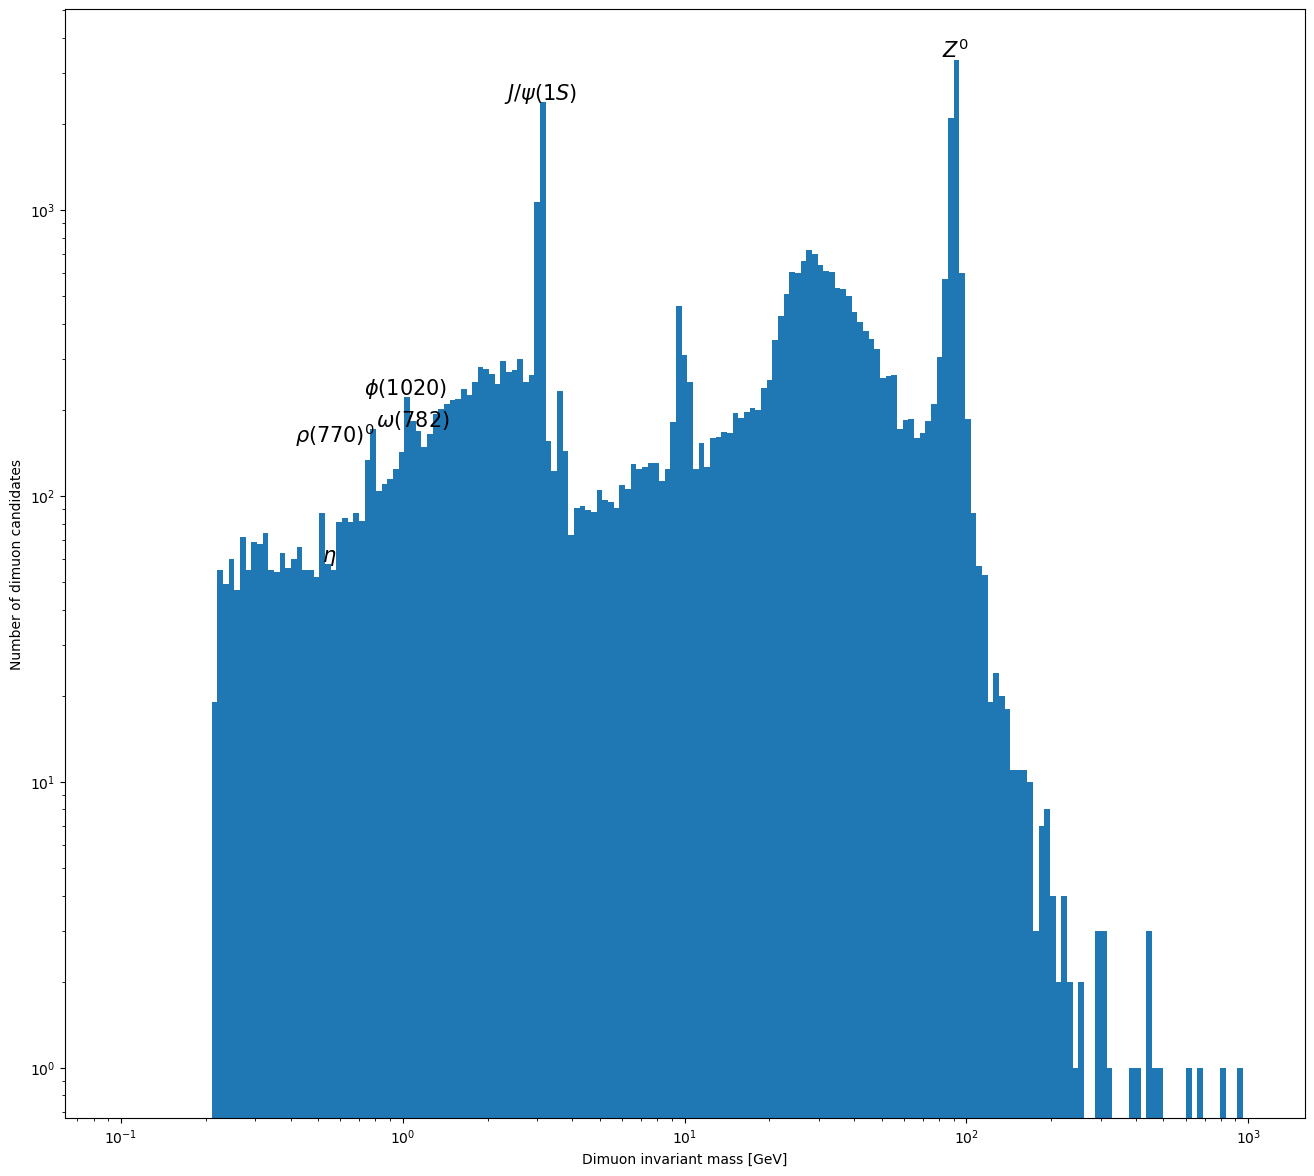

In [55]:
import numpy as np

figsize_l, figsize_h = plt.rcParams["figure.figsize"]
plt.figure(figsize=(figsize_l*2.5, figsize_h*3.))

(yvals, binedges, patches) = plt.hist(dimuon_p4.mass, bins=np.logspace(np.log10(0.1), np.log10(1000), 200))

plt.xlabel('Dimuon invariant mass [GeV]')
plt.ylabel('Number of dimuon candidates')
plt.xscale('log')
plt.yscale('log')

import particle.literals as lpart
from hepunits import GeV
    
list_particles = [getattr(lpart,name) for name in ('eta', 'rho_770_0', 'omega_782','phi_1020','Jpsi_1S', 'Z_0')]

for p in list_particles:
    # Not a very clever way to "distribute" the particle labels but it will do
    binnumber = np.searchsorted(binedges, p.mass/GeV)
    scaling = 1.02
    if p.name == 'rho(770)0':
        x = p.mass/GeV - 0.2
        scaling = 0.9
    elif p.name == 'omega(782)':
        x = p.mass/GeV + 0.3
    else:
        x = p.mass/GeV
    plt.text(x, yvals[binnumber-1]*scaling, '${}$'.format(p.latex_name), horizontalalignment='center', fontsize=15)
        
plt.show()

&nbsp;
<div class="alert alert-warning">

<h4><b>Important note</b></h4>

These 2 packages provide a very extensive functionality set! Be sure to check their repositories and documentation.
</div>

- `awkward-array`: https://github.com/scikit-hep/awkward-1.0.
- `uproot`: https://github.com/scikit-hep/uproot4.